In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import gamma

#### PDF/CDF

- PDF f(x) 表示随机变量 X 取值为 x 的概率 P(X = x)
- CDF F(x) 表示随机变量 X 取值小于 x 的概率 P(X < x)
- inverse CDF F'(p) 表示随机变量取值 X 小于等于 F'(p) 的概率是 p


### binomial distribution

discrete probability distribution

[wiki](https://zh.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%BC%8F%E5%88%86%E5%B8%83)

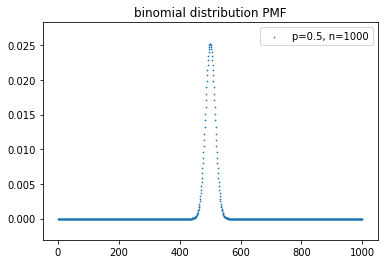

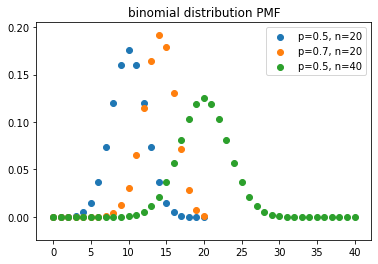

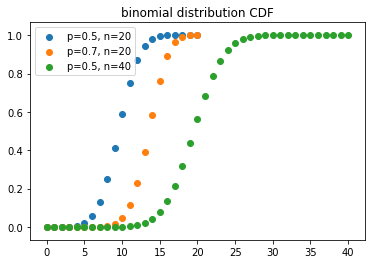

In [2]:
def binomial_pmf(p, n):
    pmf = []
    for k in range(n + 1):
        coef = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
        pmf.append(coef * (p ** k) * ((1 - p) ** (n - k)))
    return list(range(n + 1)), pmf
    
p, n = 0.5, 1000
x, pmf = binomial_pmf(p, n)
plt.scatter(x, pmf, label=f"p={p}, n={n}", s=0.5)
plt.title("binomial distribution PMF")
plt.legend()
plt.show()

for p, n in ((0.5, 20), (0.7, 20), (0.5, 40)):
    x, pmf = binomial_pmf(p, n)
    plt.scatter(x, pmf, label=f"p={p}, n={n}")
  
plt.title("binomial distribution PMF")
plt.legend()
plt.show()

for p, n in ((0.5, 20), (0.7, 20), (0.5, 40)):
    x, pmf = binomial_pmf(p, n)
    cdf = np.cumsum(pmf)
    plt.scatter(x, cdf, label=f"p={p}, n={n}")
    
plt.title("binomial distribution CDF")
plt.legend()
plt.show()



### beta distribution

continuous probability distributions

[wiki](https://en.wikipedia.org/wiki/Beta_distribution)

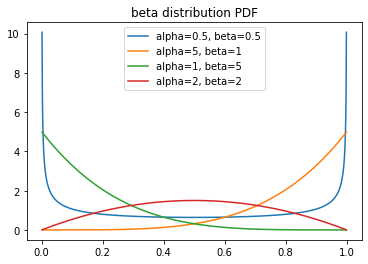

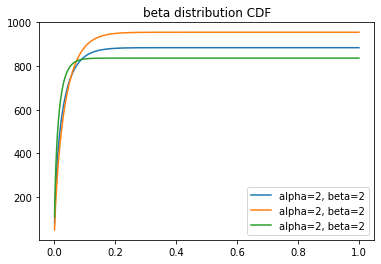

In [3]:
def beta_pdf(alpha, beta):
    x = np.arange(0 + 1e-3, 1, 0.001)
    normalizer = (gamma(alpha + beta) / (gamma(alpha) * gamma(beta)))
    return x, normalizer * (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

for alpha, beta in ((0.5, 0.5), (5, 1), (1, 5), (2, 2)):
    x, pdf = beta_pdf(alpha, beta)
    plt.plot(x, pdf, label=f"alpha={alpha}, beta={beta}")
  
plt.title("beta distribution PDF")
plt.legend()
plt.show()

for p, n in ((0.5, 20), (0.7, 20), (0.5, 40)):
    x, pdf = beta_pdf(p, n)
    cdf = np.cumsum(pdf)
    plt.plot(x, cdf, label=f"alpha={alpha}, beta={beta}")
    
plt.title("beta distribution CDF")
plt.legend()
plt.show()

### truncated normal distribution

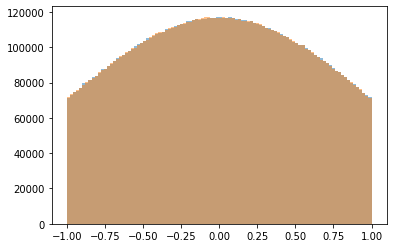

In [5]:
def truncate_norm1(low, high, mean, std, size):
    tn = stats.truncnorm(low, high, loc=mean, scale=std)
    return tn.rvs(size)
    

def truncate_norm2(low, high, mean, std, size):
    data = np.random.normal(loc=mean, scale=std, size=size)
    while True:
        mask = (data > low) & (data < high)
        if mask.all():
            break
        data[~mask] = np.random.normal(loc=mean, scale=std, size=(~mask).sum())
    return data

values1 = truncate_norm1(-1, 1, 0, 1, (1000, 10000))
values1 = np.ravel(values1)

values2 = truncate_norm2(-1, 1, 0, 1, (1000, 10000))
values2 = np.ravel(values2)

plt.hist(values1, bins=100, alpha=0.5)
plt.hist(values2, bins=100, alpha=0.5)
plt.show()

### Conjugate Distributions

If **the posterior distribution p(θ | x) is in the same probability distribution family as the prior probability distribution p(θ)**, the prior and posterior are then called conjugate distributions.

see [wiki](https://en.wikipedia.org/wiki/Conjugate_prior)

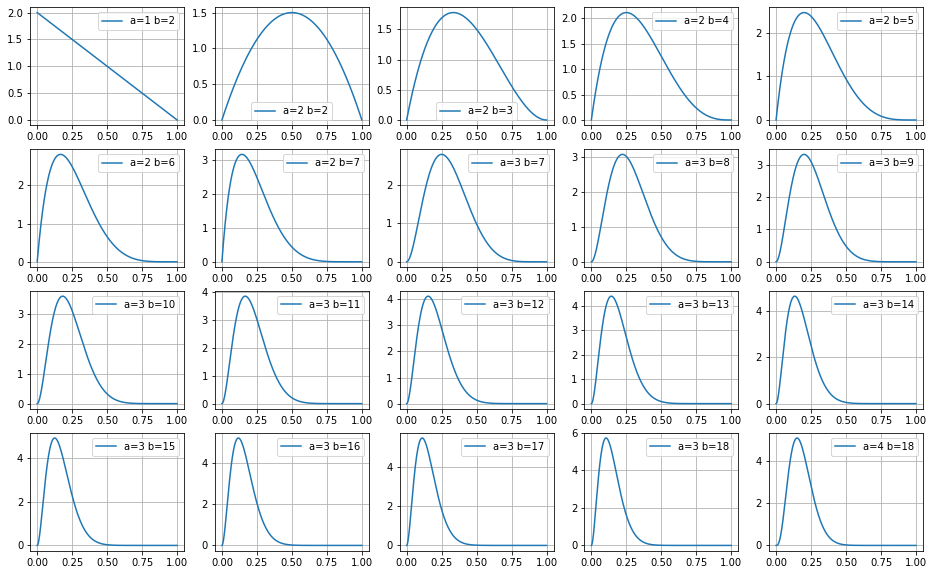

In [76]:
# 1. Beta distribution
def beta_pdf(alpha, beta):
    x = np.arange(0, 1 + 1e-4, 0.001)
    normalizer = (gamma(alpha + beta) / (gamma(alpha) * gamma(beta)))
    return x, normalizer * (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

a, b = 1, 1
fig = plt.figure(figsize=(16, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    sample = np.random.uniform() < 0.2
    if sample == 1:
        a += 1
    else:
        b += 1
    x, y = beta_pdf(a, b)
    plt.plot(x, y, label=f"a={a} b={b}")
    plt.legend()
    plt.grid()

plt.show()

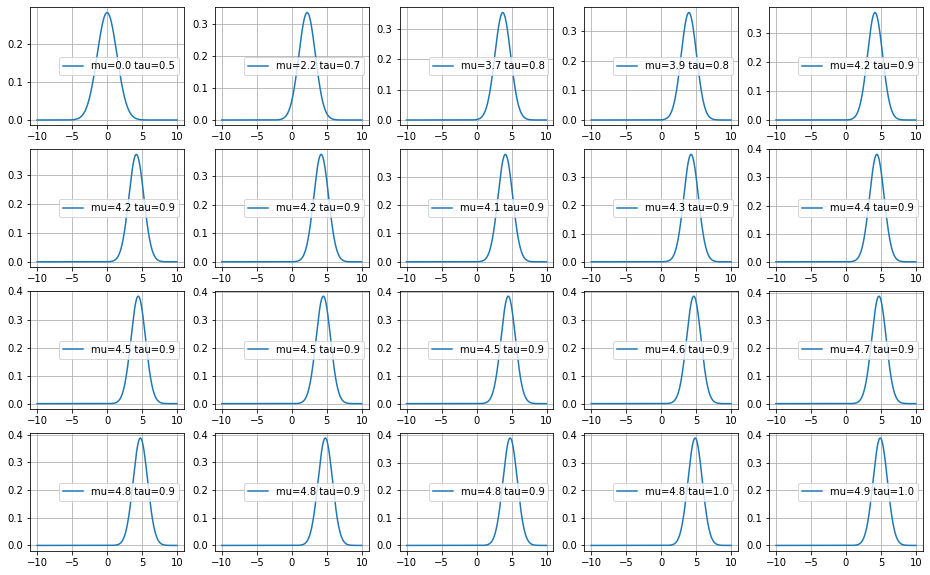

In [136]:
# 2. Normal distribution (with known precision)
def gaussian_pdf(mu, tau):
    sigma = (1 / tau) ** 0.5
    x = np.arange(-10, 10, 0.01)
    y = np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * (2 * np.pi) ** 0.5)
    return x, y
    
tau0 = 1
mu, tau = 0, 1e-4

R = 0
plt.figure(figsize=(16, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    sample = np.random.normal(5, (1 / tau0) ** 0.5)
    mu = (tau * mu + tau0 * R) / (tau + (i + 1) * tau0)
    tau = (tau + (i + 1) * tau0)
    tau = 1 / (1 / tau + 1 / tau0)
    R += sample
    
    x, y = gaussian_pdf(mu, tau)
    plt.plot(x, y, label=f"mu={mu:.1f} tau={tau:.1f}")
    plt.legend()
    plt.grid()

plt.show()

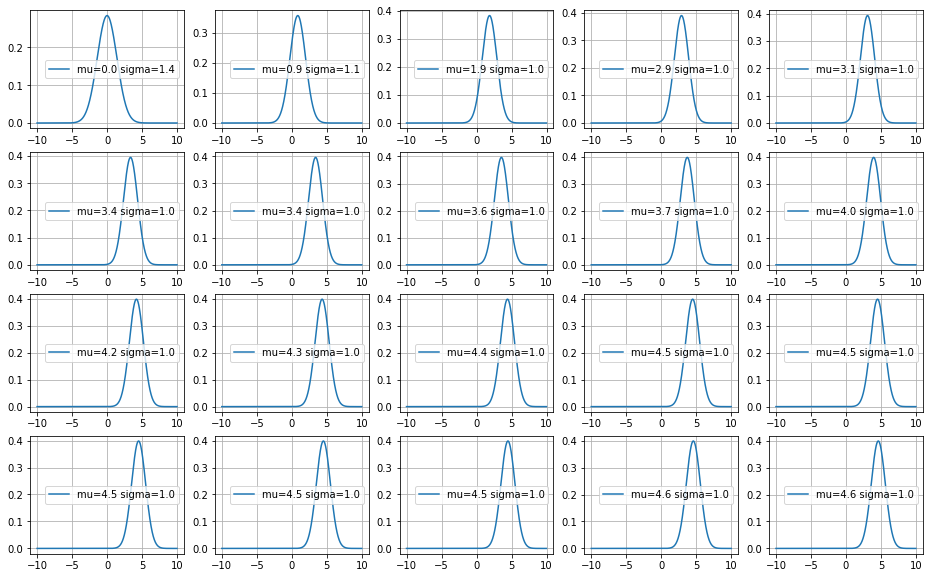

In [145]:
# 2. Normal distribution (with known std)
def gaussian_pdf(mu, sigma):
    x = np.arange(-10, 10, 0.01)
    y = np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * (2 * np.pi) ** 0.5)
    return x, y
    
sigma0 = 1
mu, sigma = 0, 10

R = 0
plt.figure(figsize=(16, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    sample = np.random.normal(5, sigma0)
    mu = (mu / sigma0 ** 2 + R / sigma ** 2) / (1 / sigma0 ** 2 + (i + 1) / sigma ** 2)
    sigma = 1 / (1 / sigma0 ** 2 + (i + 1) / sigma ** 2)
    sigma = (sigma ** 2 + sigma0 ** 2) ** 0.5
    R += sample

    x, y = gaussian_pdf(mu, sigma)
    plt.plot(x, y, label=f"mu={mu:.1f} sigma={sigma:.1f}")
    plt.legend()
    plt.grid()

plt.show()

### 逆变换采样 (Inverse Sampling)

逆变换采样用于从一个标准 01 均匀分布得到目标分布的随机采样

1. U 是一个服从 01 均匀分布的随机变量  $U\sim \text{Uniform}(0,1)$
2. 设 X 是目标分布的随机变量，其累积分布函数为 $F_{X}(x)$
3. 用 U 作为输入，通过逆累积分布函数 $F^{-1}_X(u)$ 即可得到服从目标分布的随机变量

证明：随机变量 $F^{-1}_X(u)$ 服从累计分布函数 $F_{X}(x)$，即 $P(F^{-1}_X(U) \leq x) = F_X(x)$

1. $F_{X}$ 单调递增，因此 $F_{X}^{-1}$ 单调递增，因此 $F_X^{-1}(U) \leq x$ 当且仅当 $U \leq F_X(x)$，$P(F_X^{-1}(U) \leq x) = P(U \leq F_X(x))$
2. 由于 U 是均匀分布随机变量，因此 $P(U \leq F_X(x)) = F_X(x)$
3. 综合 1、2 有 $P(F^{-1}_X(U) \leq x) = F_X(x)$，即随机变量 $F^{-1}_X(u)$ 服从目标分布